In [1]:
from sklearn import model_selection
from sklearn import metrics
import os
import numpy as np
import pandas as pd
from MicroBiome import MicroBiomeDataSet, Trainer, TrainTester, MultiTrainTester
from sklearn import linear_model as LM
import seaborn as sns

# Ignore warning messages
if True:
    import warnings
    warnings.filterwarnings('ignore')

# Load Data

In [2]:
top_dir = '/project'
data_dir = os.path.join(top_dir, 'data')
preproc_dir = os.path.join(data_dir, 'preprocessed')
inp_dir = os.path.join(preproc_dir, 'Gupta_2020_Precompiled_Cleaned')

In [3]:
MatrixData = np.loadtxt(os.path.join(inp_dir, 'MatrixDataClean.csv'))
MatrixData.shape

(4347, 903)

In [4]:
SampleMeta = pd.read_csv(os.path.join(inp_dir, 'SampleMetaDataClean.csv'))
SampleMeta.head()

,6,study,Study No. (From VG sheet (V-*) from SB sheet (S-*)),Title of Paper,Author (year),Journal,Study Accession,Sample Accession or Sample ID,Sample title (ENA/SRA),Sample title (Paper),...,Use of milk or milk products (Yes/No/Sometimes),Use of Animal Product- Meat (Yes/No/Vegetarian/Vegan),Alcohol Consumption (Yes/No),Diet1,Intervention for study (Diet),Intervention for study (medication),Sequencing Platform,Library layout (SINGLE/PAIRED),Read count after Quality control,Healthy
0,SAMEA104142287,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142287,ZSL-004,ZSL-004,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,43356775.0,Unhealthy
1,SAMEA104142288,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142288,ZSL-007,ZSL-007,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,41073871.0,Unhealthy
2,SAMEA104142293,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142293,ZSL-010,ZSL-010,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,40199673.0,Unhealthy
3,SAMEA104142291,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142291,ZSL-011,ZSL-011,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,31054158.0,Unhealthy
4,SAMEA104142284,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142284,ZSL-019,ZSL-019,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,36081150.0,Unhealthy


In [5]:
FeatMeta = pd.read_csv(os.path.join(inp_dir, 'FeatMetaDataClean.csv'))
FeatMeta.head()

,Unnamed: 0,feature
0,s__Abiotrophia_defectiva,s__Abiotrophia_defectiva
1,s__Acetobacter_unclassified,s__Acetobacter_unclassified
2,s__Achromobacter_piechaudii,s__Achromobacter_piechaudii
3,s__Achromobacter_unclassified,s__Achromobacter_unclassified
4,s__Achromobacter_xylosoxidans,s__Achromobacter_xylosoxidans


# Define and Train Model

In [6]:
# random seed here deals with model initialization
MyTrainer = Trainer(model = LM.LogisticRegressionCV(random_state = 42, multi_class='ovr'), scale_X = True, use_pca = False)
# random seed used in class definition is not used in final output models
MyTrainTester = TrainTester(MyTrainer, metrics.accuracy_score )
# note that random seed here affects sequence of seeds passed to making new TrainTester objects
# using LRTrainTester as template. Thus, you have all settings but seed affecting sample split
# across all data splits
n_splits = 5
MyMultiTrainTester = MultiTrainTester(MyTrainTester, numpy_rand_seed = 42, n_splits = n_splits)

In [7]:
y = SampleMeta['Phenotype'].to_numpy().astype('str')
#y = y.astype('int64')
y

array(['ACVD', 'ACVD', 'ACVD', ..., 'Underweight', 'Underweight',
       'Underweight'], dtype='<U27')

In [8]:
oneHotEncoders, oneHotMap = MyMultiTrainTester.buildEncoder( np.unique(y) )

In [9]:
oneHotMap

{'ACVD': 0,
 'CRC': 1,
 'Crohns disease': 2,
 'Healthy': 3,
 'IGT': 4,
 'Obesity': 5,
 'Overweight': 6,
 'Rheumatoid Arthritis': 7,
 'Symptomatic atherosclerosis': 8,
 'T2D': 9,
 'Ulcerative colitis': 10,
 'Underweight': 11,
 'advanced adenoma': 12}

In [10]:
oneHotEncoders

{'ACVD': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'CRC': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Crohns disease': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Healthy': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'IGT': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 'Obesity': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 'Overweight': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 'Rheumatoid Arthritis': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 'Symptomatic atherosclerosis': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 'T2D': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 'Ulcerative colitis': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 'Underweight': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 'advanced adenoma': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]}

In [11]:
y = np.array([ oneHotMap[class_pheno] for class_pheno in y ])
y

array([ 0,  0,  0, ..., 11, 11, 11])

In [12]:
MyMultiTrainTester.train(MatrixData, y)

Running for split 1 of 5
Running for split 2 of 5
Running for split 3 of 5
Running for split 4 of 5
Running for split 5 of 5


In [13]:
scores_df = pd.DataFrame({'score': MyMultiTrainTester.train_scores, 'stage' : np.repeat('train', n_splits)})
scores_df = scores_df.append(pd.DataFrame({'score': MyMultiTrainTester.test_scores, 'stage' : np.repeat('test', n_splits)}))
scores_df

,score,stage
0,0.669255,train
1,0.682773,train
2,0.686799,train
3,0.693989,train
4,0.685073,train
0,0.619540,test
1,0.625287,test
2,0.624138,test
3,0.608046,test
4,0.588506,test


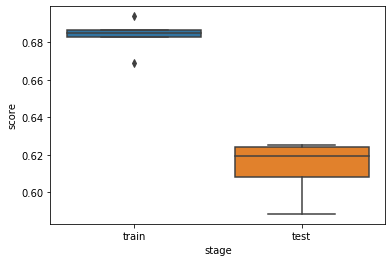

In [14]:
sns.boxplot(data = scores_df, x = 'stage', y = 'score')

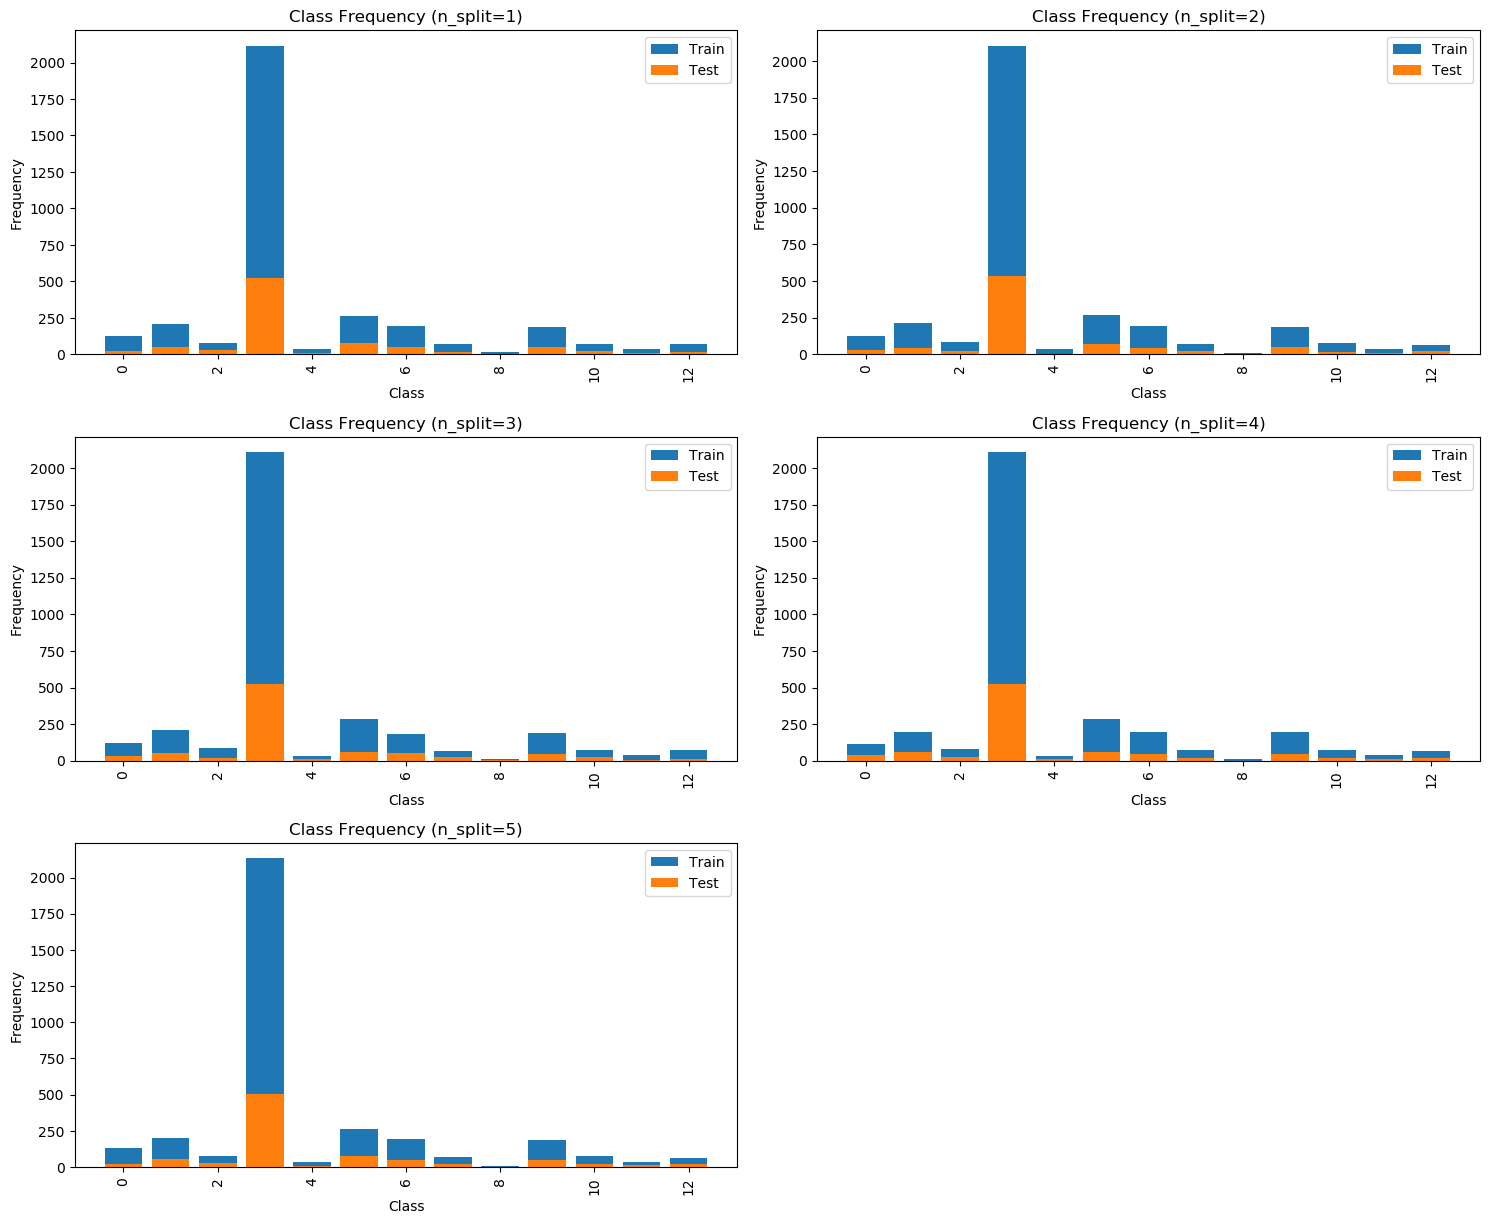

In [15]:
MyMultiTrainTester.plot_class_freq(normalize=True)

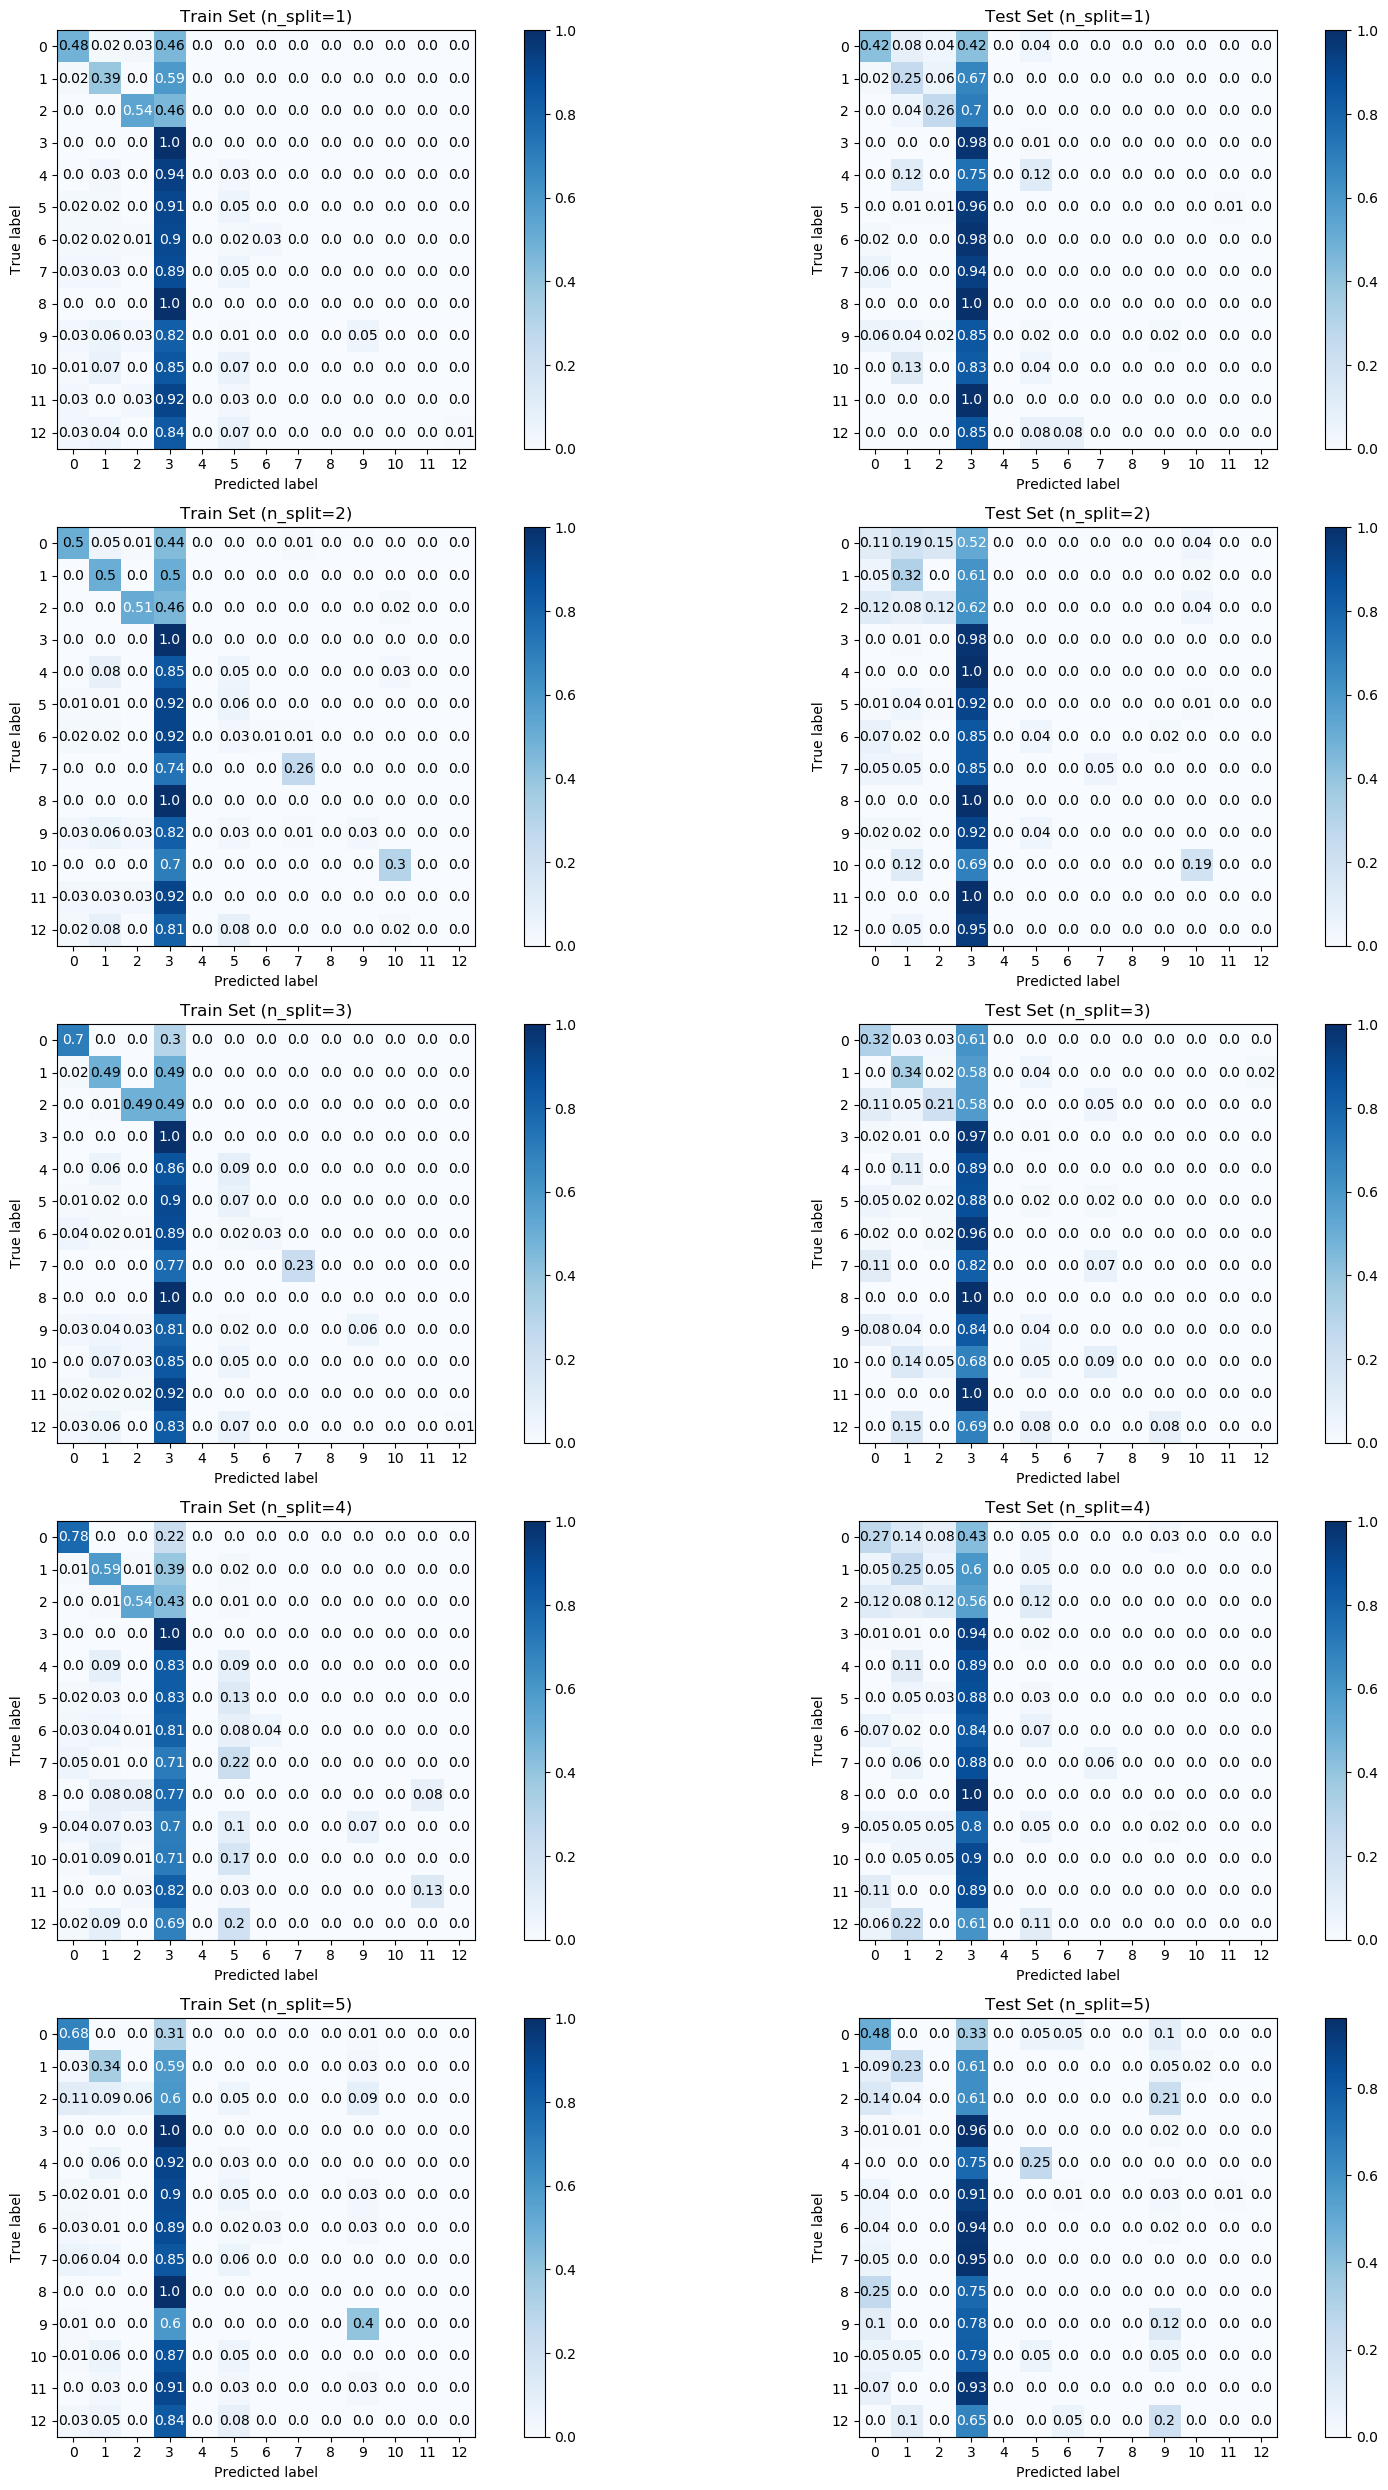

In [16]:
MyMultiTrainTester.plot_confusion(normalize=True)

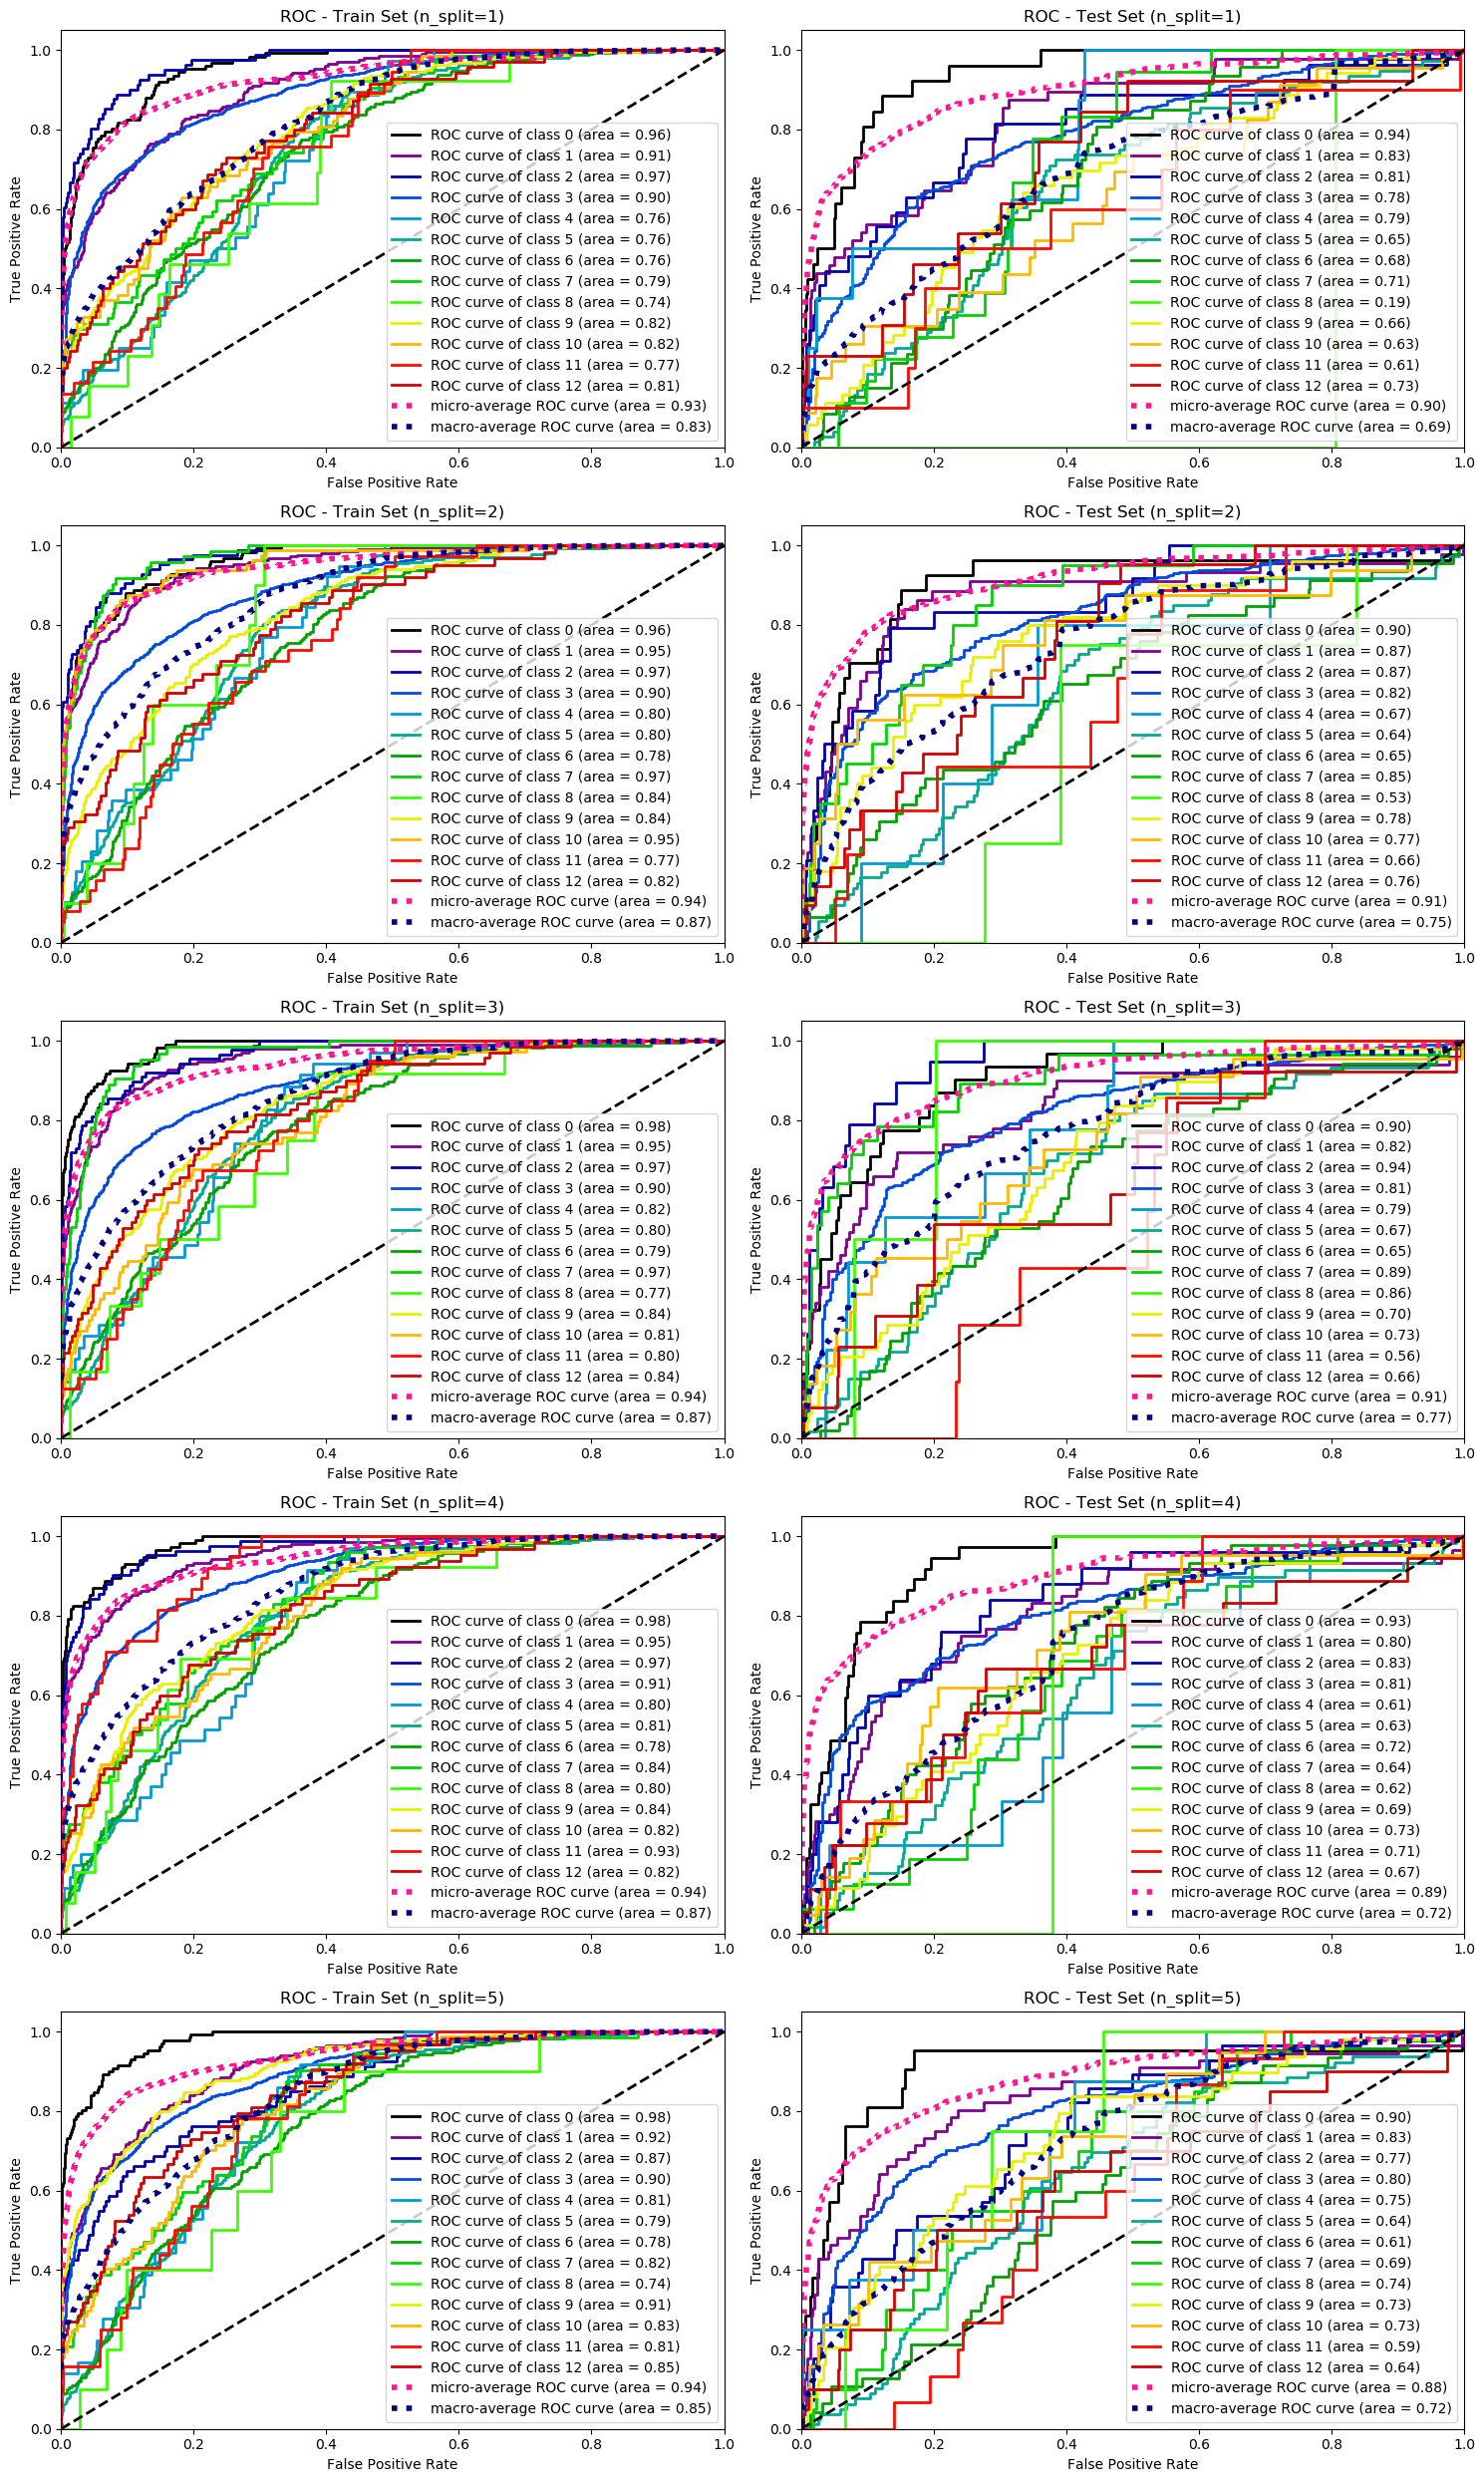

In [17]:
MyMultiTrainTester.plot_roc()

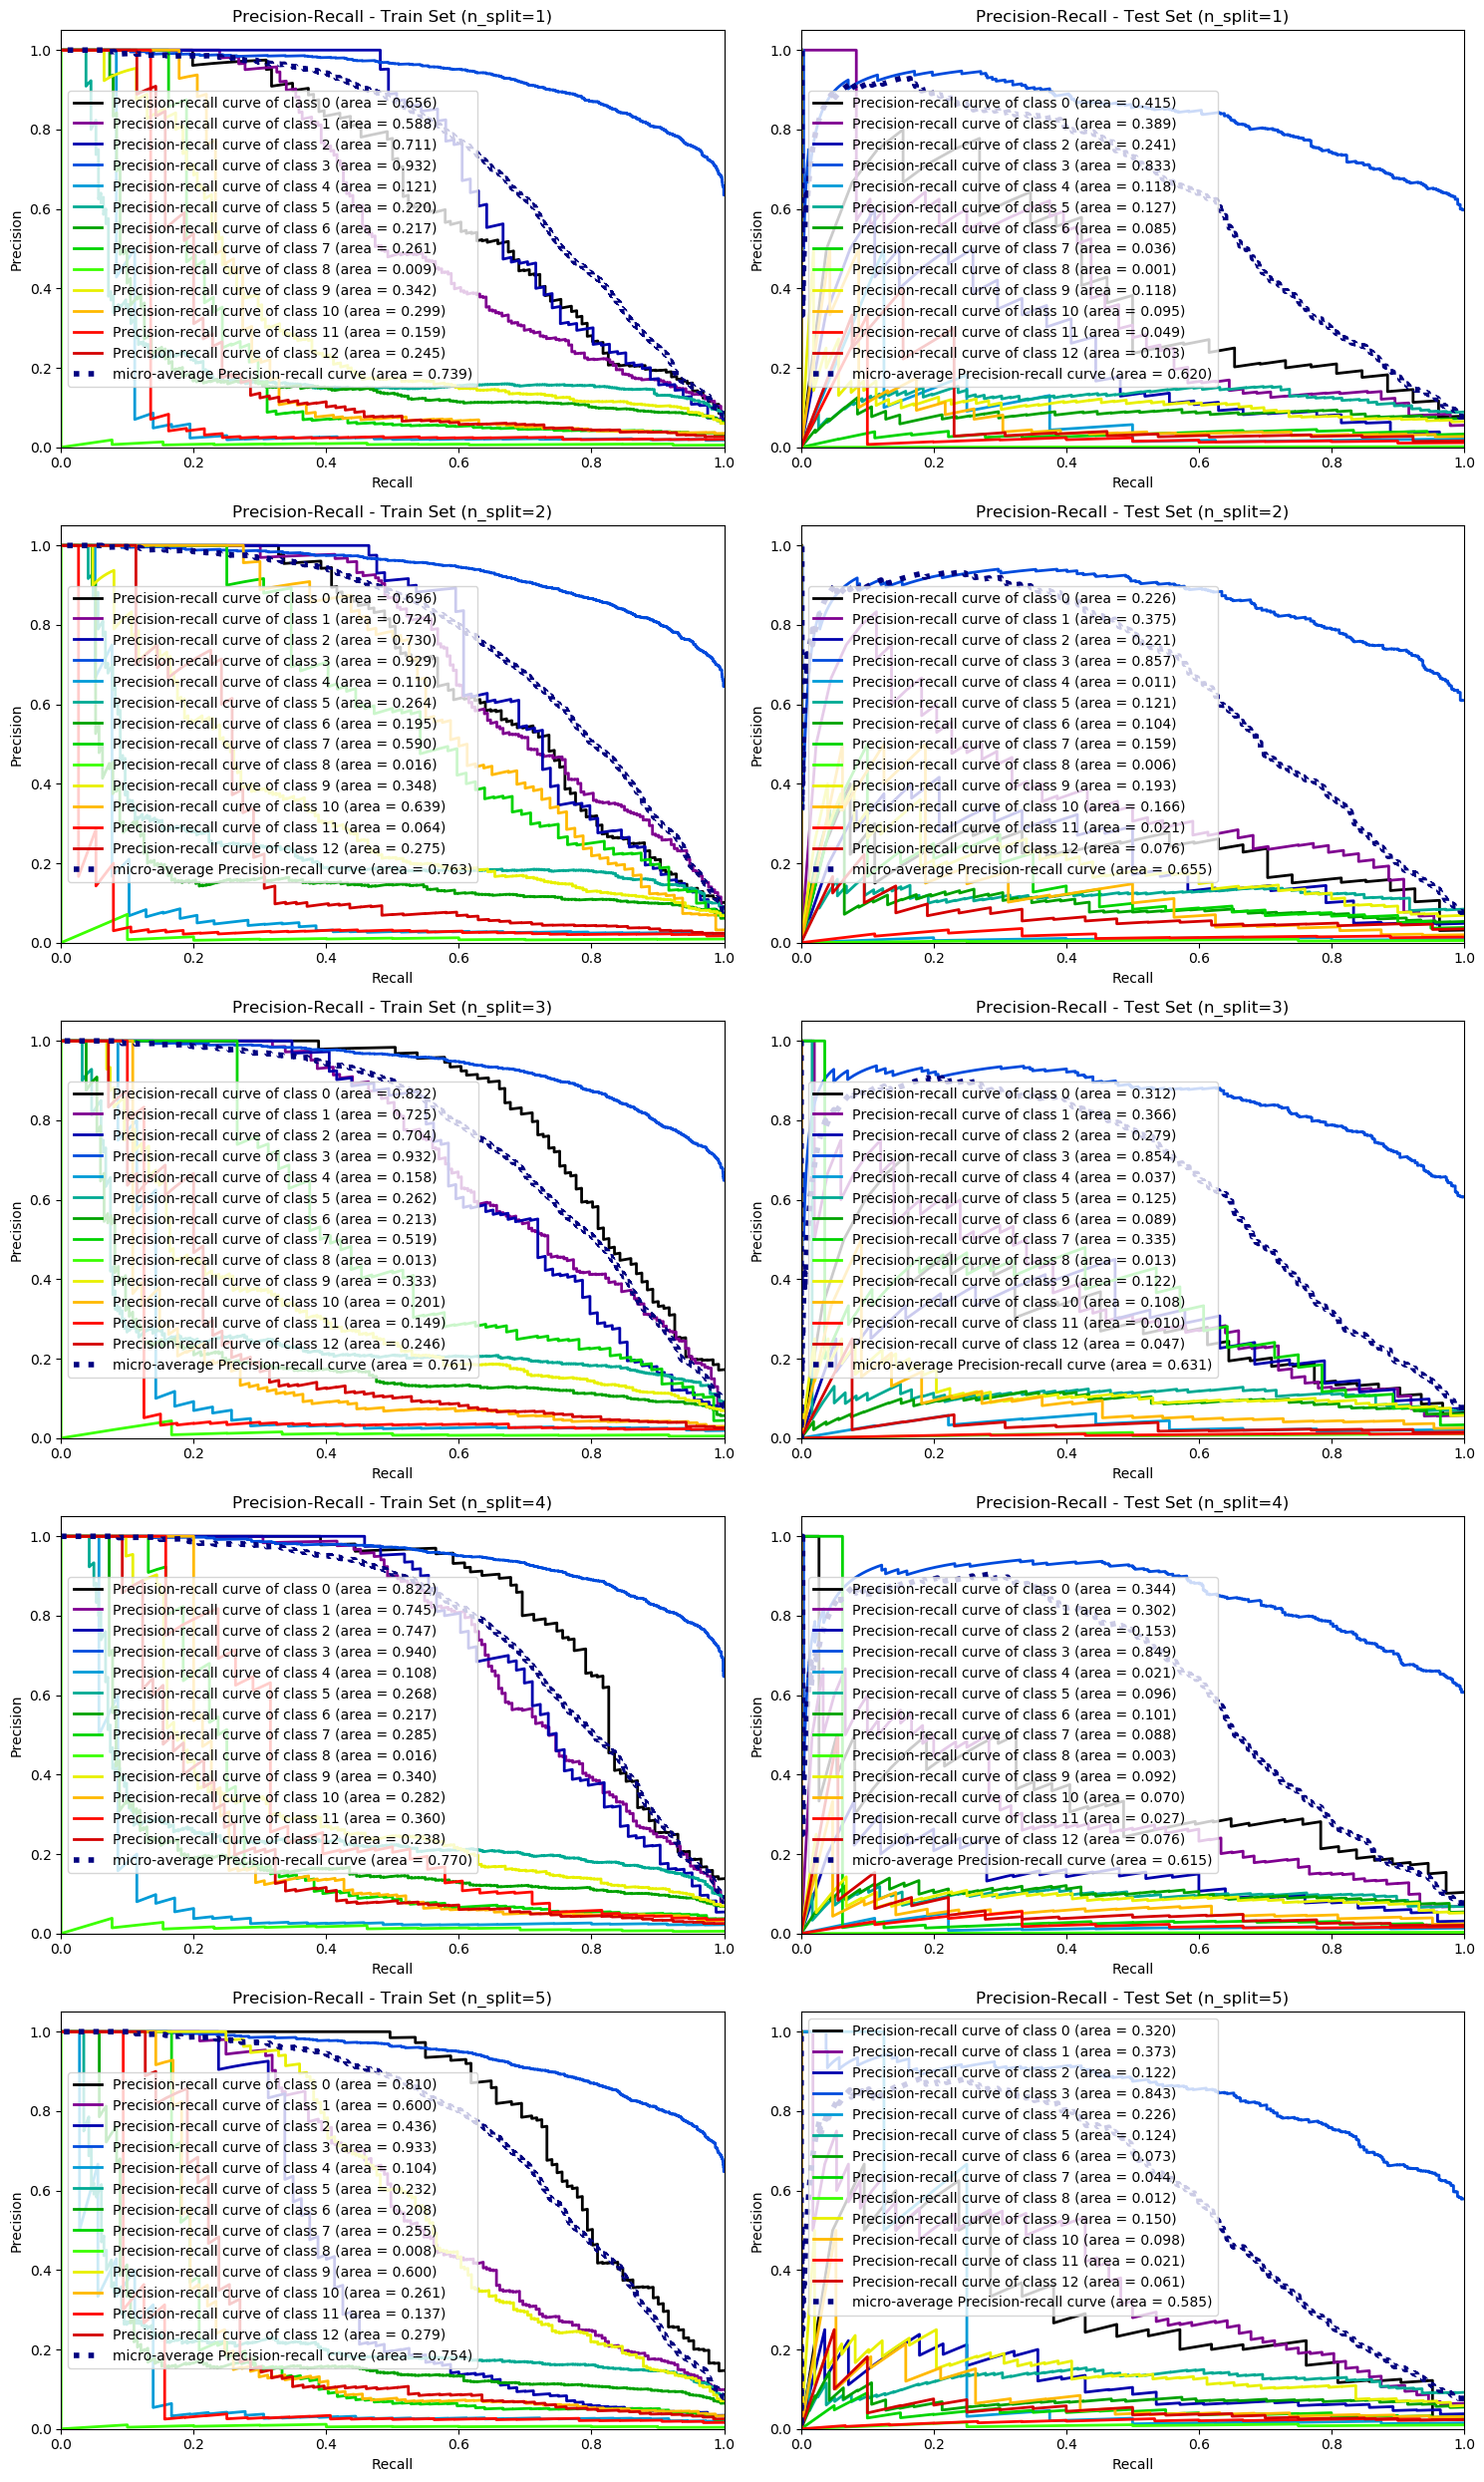

In [18]:
MyMultiTrainTester.plot_precrecall()